In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

Intersection functions and demonstrations:  intersect_two_param_spaces(ps1, ps2) will take two parameter spaces and compute their intersection.

In [2]:
def intersect_two_1d_boxes(a,b):
    """Given 2 intervals a = [a0,a1] and b=[b0,b1], check whether they intersect.  If they do, return their intersection."""
    if a[0] <= b[0]:
        minArray = a
        maxArray = b
    else:
        minArray = b
        maxArray = a
    if minArray[1] > maxArray[0]: ## has nonempty intersection. return intersection
        return [maxArray[0], minArray[1]]
    else: ## no intersection.
        return []

In [3]:
print(intersect_two_1d_boxes([0,2],[1,3]))
print(intersect_two_1d_boxes([0,1],[1,2]))
print(intersect_two_1d_boxes([0,1],[2,3]))

[1, 2]
[]
[]


In [4]:
def intersect_two_boxes(a,b):
    result = []
    d = len(a) ## dimension
    for i in range(d):
        subresult = intersect_two_1d_boxes(a[i],b[i])
        if subresult == []:
            return None
        else:
            result.append(subresult)
    return result

In [5]:
box_1 = [[4.76837158203125, 4.887580871582031], [10.967254638671875, 11.205673217773438]]
box_2 = [[4.887580871582031, 4.947185516357422], [11.801719665527344, 11.920928955078125]]
print(intersect_two_boxes(box_1,box_2))

box_1 = [[4.76837158203125, 4.887580871582031], [10.967254638671875, 11.205673217773438]]
box_2 = [[4.76837158203125, 4.887580871582031], [11.801719665527344, 11.920928955078125]]
print(intersect_two_boxes(box_1,box_2))

box_1 = [[4.76837158203125, 4.887580871582031], [10.967254638671875, 11.205673217773438]]
box_2 = [[4.76837158203125, 4.887580871582031], [10,11]]
print(intersect_two_boxes(box_1,box_2))



None
None
[[4.76837158203125, 4.887580871582031], [10.967254638671875, 11]]


General 2d box plotting function and example:

In [6]:
def plot2DBox(box, color="b",alpha=0.2):
    x_limits = [box[0][0],box[0][1]]
    y_limits = [box[1][0],box[1][1]]
    x = np.linspace(x_limits[0], x_limits[1], 1000)
    plt.fill_between(x, y_limits[0], y_limits[1], color=color, alpha=alpha)

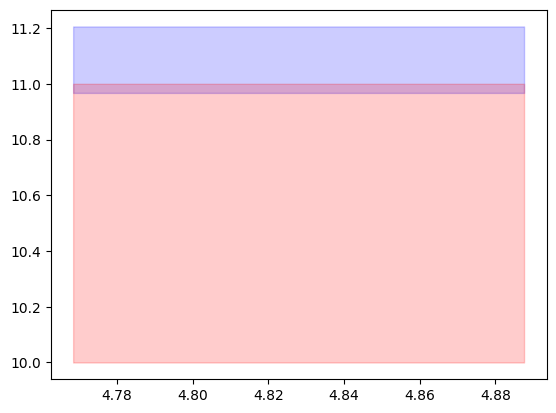

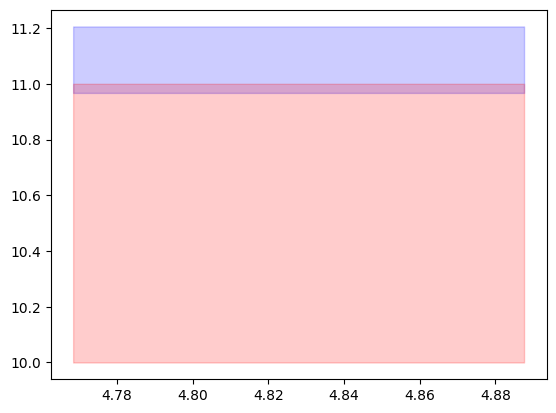

In [7]:
box_1 = [[4.76837158203125, 4.887580871582031], [10.967254638671875, 11.205673217773438]]
box_2 = [[4.76837158203125, 4.887580871582031], [10,11]]
plot2DBox(box_1)
plot2DBox(box_2, color='r')
plt.show()
plot2DBox(box_1)
plot2DBox(box_2, color='r')

Intersection function for two parameter spaces:

In [8]:
def intersect_two_param_spaces(ps1, ps2):
    results_list = []
    for box1 in ps1:
        for box2 in ps2:
            subresult = intersect_two_boxes(box1, box2)
            if subresult != None:
                results_list.append(subresult)
    return results_list

Example plotting two parameter spaces separately (in translucent red and blue), then computing their intersection and plotting it (in green)

In [9]:
paramsp1 = [[[4.76837158203125, 4.887580871582031], [10.967254638671875, 11.205673217773438]],
[[4.887580871582031, 4.947185516357422], [11.801719665527344, 11.920928955078125]],
[[2.86102294921875, 3.814697265625], [10.49041748046875, 11.444091796875]]]

paramsp2 = [[[4.887580871582031, 4.947185516357422], [11.801719665527344, 11.920928955078125]],
[[2.86102294921875, 3.814697265625], [10.49041748046875, 11.444091796875]],
[[3.337860107421875, 3.814697265625], [11.444091796875, 11.920928955078125]]]

print(intersect_two_param_spaces(paramsp1, paramsp2))


[[[4.887580871582031, 4.947185516357422], [11.801719665527344, 11.920928955078125]], [[2.86102294921875, 3.814697265625], [10.49041748046875, 11.444091796875]]]


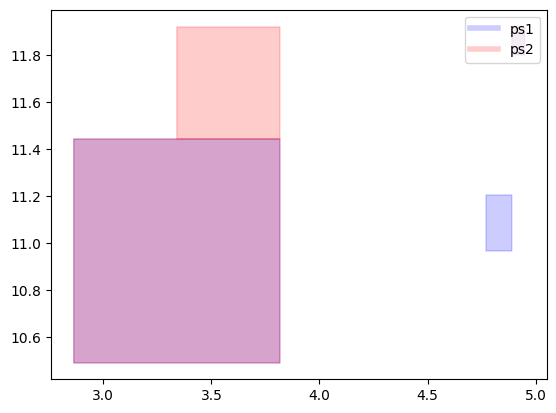

In [10]:
custom_lines = [
    Line2D([0], [0], color="b", lw=4,alpha=0.2),
    Line2D([0], [0], color="r", lw=4,alpha=0.2),
]

plt.legend(custom_lines, ["ps1", "ps2"])

for b1 in paramsp1:
    plot2DBox(b1, color = 'b')
for b2 in paramsp2:
    plot2DBox(b2, color = 'r')

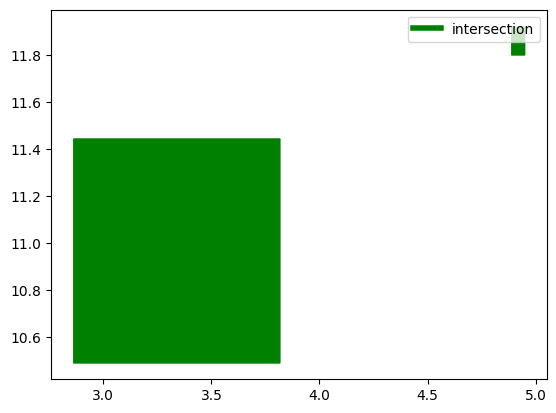

In [11]:
custom_lines = [
    Line2D([0], [0], color="g", lw=4,alpha=1),
]

plt.legend(custom_lines, ["intersection"])


paramsp3 = intersect_two_param_spaces(paramsp1, paramsp2)
for b3 in paramsp3:
    plot2DBox(b3, color = 'g', alpha=1)

Symmetric difference functions:

In [12]:
def symmetric_difference_two_1d_boxes(a,b):
    """Given 2 intervals a = [a0,a1] and b=[b0,b1], return their symmetric difference (points not in their intersection)."""
    if a == b: ## no symmetric difference
        return None
    else:
        if a[0] <= b[0]:
            minArray = a
            maxArray = b
        else:
            minArray = b
            maxArray = a
        if minArray[1] > maxArray[0]: ## has nonempty intersection. form symmetric differences and return them
            return [[minArray[0], maxArray[0]],[minArray[1], maxArray[1]]]
        else: ## no intersection. symmetric difference is the entirety of the 2 arrays
            return [minArray, maxArray]


In [13]:
def subtract_two_1d_boxes(a,b):
    """Given 2 intervals a = [a0,a1] and b=[b0,b1], return the part of a that does not intersect with b."""
    if intersect_two_1d_boxes(a,b) == None:
        return a
    else:
        if a[0] < b[0]:
            return [a[0],b[0]]
        elif a[0] > b[0]:
            return [b[1],a[1]]
        

In [14]:
def symmetric_difference_two_boxes(a,b): ### WIP - just for 2 dimensions at this point.
    result = []
    if a == b:
        result = None 
    elif intersect_two_boxes(a,b) == None: ## no intersection so they are disjoint - return both original boxes
        result = [a,b]
    else:
        xbounds = subtract_two_1d_boxes(a[0],b[0])
        if xbounds != None:
            result.append([xbounds,a[1]])
        xbounds = subtract_two_1d_boxes(b[0],a[0])
        if xbounds != None:
            result.append([xbounds,b[1]])
        ybounds = subtract_two_1d_boxes(a[1],b[1])
        if ybounds != None:
            result.append([a[0],ybounds]) 
        ybounds = subtract_two_1d_boxes(b[1],a[1])
        if ybounds != None:
            result.append([b[0],ybounds])         
    return result

In [15]:
print(symmetric_difference_two_1d_boxes([0,2],[1,3]))
print(symmetric_difference_two_1d_boxes([0,1],[1,2]))
print(symmetric_difference_two_1d_boxes([0,1],[2,3]))
print(symmetric_difference_two_1d_boxes([0,1],[0,1]))

[[0, 1], [2, 3]]
[[0, 1], [1, 2]]
[[0, 1], [2, 3]]
None


In [16]:
# ## Test case: disjoint. Should return [[[1, 2], [0, 1]], [[3, 4], [5, 6]]]
# box_1 = [[1,2], [0,1]]
# box_2 = [[3,4], [5,6]]
# print(symmetric_difference_two_boxes(box_1,box_2))

# ## Test case: disjoint. Should return [[[1, 2], [0, 1]], [[1,2], [5, 6]]]
# box_1 = [[1,2], [0,1]]
# box_2 = [[1,2], [5,6]]
# print(symmetric_difference_two_boxes(box_1,box_2))

# ## Test case: not disjoint.

# box_1 = [[0,2],[3,5]]
# box_2 = [[1,3],[4,6]]
# print(symmetric_difference_two_boxes(box_1,box_2))

## Test case: not disjoint.

box_1 = [[0,2],[3,5]]
box_2 = [[0,2],[4,6]]
print(symmetric_difference_two_boxes(box_1,box_2))


[[[0, 2], [3, 4]], [[0, 2], [5, 6]]]


In [17]:
def symmetric_difference_two_param_spaces(ps1, ps2):
    results_list = []
    for box2 in ps2:
        box2_results = []
        for box1 in ps1:
            subresult = symmetric_difference_two_boxes(box2, box1)
            if subresult != None:
                box2_results.append(subresult[0])
            elif subresult == None:
                box2_results.append(subresult)
#         print(box1_results)
        if None in box2_results:
            pass
        else:
            results_list.append(box2_results[0])
    for box1 in ps1:
        box1_results = []
        for box2 in ps2:
            subresult = symmetric_difference_two_boxes(box1, box2)
            if subresult != None:
                box1_results.append(subresult[0])
            elif subresult == None:
                box1_results.append(subresult)
        if None in box1_results:
            pass
        else:
            results_list.append(box1_results[0])
    return results_list

Example/test using symmetric difference of two parameter spaces:


In [18]:
paramsp1 = [[[4.76837158203125, 4.887580871582031], [10.967254638671875, 11.205673217773438]],
[[4.887580871582031, 4.947185516357422], [11.801719665527344, 11.920928955078125]],
[[2.86102294921875, 3.814697265625], [10.49041748046875, 11.444091796875]]]

paramsp2 = [[[4.887580871582031, 4.947185516357422], [11.801719665527344, 11.920928955078125]],
[[2.86102294921875, 3.814697265625], [10.49041748046875, 11.444091796875]],
[[3.337860107421875, 3.814697265625], [11.444091796875, 11.920928955078125]]]

symmetric_difference_two_param_spaces(paramsp1, paramsp2)

[[[3.337860107421875, 3.814697265625], [11.444091796875, 11.920928955078125]],
 [[4.76837158203125, 4.887580871582031],
  [10.967254638671875, 11.205673217773438]]]

In [19]:
box_1 = [[2.86102294921875, 3.814697265625], [10.49041748046875, 11.444091796875]]
box_2 = [[2.86102294921875, 3.814697265625], [10.49041748046875, 11.444091796875]]
print(symmetric_difference_two_boxes(box_1,box_2))

None


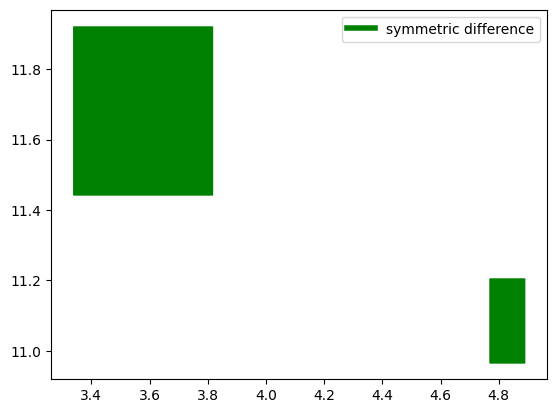

In [20]:
custom_lines = [
    Line2D([0], [0], color="g", lw=4,alpha=1),
]

plt.legend(custom_lines, ["symmetric difference"])


paramsp4 = symmetric_difference_two_param_spaces(paramsp1, paramsp2)
for b4 in paramsp4:
    plot2DBox(b4, color = 'g', alpha=1)

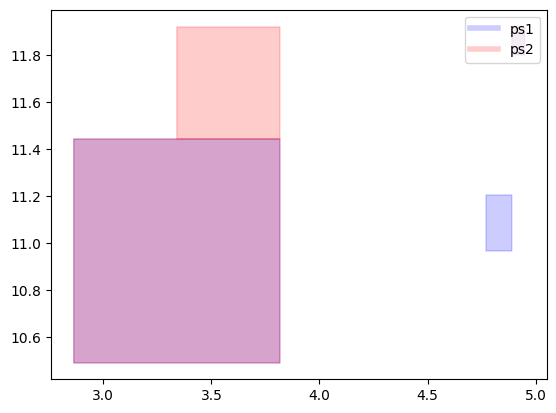

In [21]:
custom_lines = [
    Line2D([0], [0], color="b", lw=4,alpha=0.2),
    Line2D([0], [0], color="r", lw=4,alpha=0.2),
]

plt.legend(custom_lines, ["ps1", "ps2"])

for b1 in paramsp1:
    plot2DBox(b1, color = 'b')
for b2 in paramsp2:
    plot2DBox(b2, color = 'r')